# LAB 2: Dual Momentum

Hi Class!
In Lab 2 we're going to build a basic structure for the Dual Momentum strategy. In module 3 you will develop the Accelerating Dual Momentum for comparison.

You can find the dataset in the file 'Data.csv' that we have provided to you. The file contains 20 years of monthly data for four asset class: US equities, Global equities (ex US), Global Bonds (aggregate) and US Treasuries.

First of all we import the necessary modules.

In [1]:
import pandas as pd
import numpy as np

Second step is to upload price data, estimates 12 months momentum at each month and estimates monthly returns.

In [2]:
price = pd.read_csv('Data.csv', index_col="Dates")
mom = price.pct_change(12)
ret = price.pct_change()

In [5]:
price.tail()

,S&P 500,Global Equity ex US,Global Bond,Treasury
Dates,,,,
31/12/2018,2506.85,255.41,478.9153,2217.70
31/01/2019,2704.10,274.46,486.2068,2228.14
28/02/2019,2784.49,279.30,483.4082,2222.10
29/03/2019,2834.40,279.79,489.4602,2264.52
30/04/2019,2945.83,286.39,488.0109,2258.24


In [16]:
mom.head(13)

,S&P 500,Global Equity ex US,Global Bond,Treasury
Dates,,,,
30/04/1999,NaN,NaN,NaN,NaN
31/05/1999,NaN,NaN,NaN,NaN
30/06/1999,NaN,NaN,NaN,NaN
30/07/1999,NaN,NaN,NaN,NaN
31/08/1999,NaN,NaN,NaN,NaN
30/09/1999,NaN,NaN,NaN,NaN
29/10/1999,NaN,NaN,NaN,NaN
30/11/1999,NaN,NaN,NaN,NaN
31/12/1999,NaN,NaN,NaN,NaN


In the third step we fix the length of our dataset and we prepare a DataFrame where we're goig to store results.

In [3]:
l = len(mom)
w = pd.DataFrame(np.zeros(shape=(l,3)), index=ret.index)

In [4]:
l

241

In [8]:
w.tail()

,0,1,2
Dates,,,
31/12/2018,0.0,0.0,0.0
31/01/2019,0.0,0.0,0.0
28/02/2019,0.0,0.0,0.0
29/03/2019,0.0,0.0,0.0
30/04/2019,0.0,0.0,0.0


We described the strategy in the previous lecture: 
1. Calculate the 12-month returns for both S&P 500 and ACWI ex-U.S. Choose the asset that has performed better. 
2. Compare that asset to the returns of BIL. If it has performed better than BIL, the buy then equity asset. If BIL has performed better, then buy bonds. 
3. Repeat steps 1 – 3 at the end of each month and replace one of the three assets with the strongest performing.

In [20]:
for i in range(12,l-1):
    if mom.iloc[i,0] > mom.iloc[i, 1]:
        if mom.iloc[i, 0] > mom.iloc[i, 3]:
            w.iloc[i+1,0] = 1
        else:
            w.iloc[i+1,2] = 1
    else:
        if mom.iloc[i, 1] > mom.iloc[i, 3]:
            w.iloc[i+1,1] = 1
        else:
            w.iloc[i+1,2] = 1

In [21]:
w

,0,1,2
Dates,,,
30/04/1999,0.0,0.0,0.0
31/05/1999,0.0,0.0,0.0
30/06/1999,0.0,0.0,0.0
30/07/1999,0.0,0.0,0.0
31/08/1999,0.0,0.0,0.0
30/09/1999,0.0,0.0,0.0
29/10/1999,0.0,0.0,0.0
30/11/1999,0.0,0.0,0.0
31/12/1999,0.0,0.0,0.0


In [19]:
mom.iloc[12,3]

0.022248340137737577

In [12]:
mom.iloc[12]

S&P 500                0.087816
Global Equity ex US    0.141227
Global Bond           -0.042425
Treasury               0.022248
Name: 28/04/2000, dtype: float64

In [10]:
for i in range(12,l-1):
    print i
    #if mom.iloc[i,0] > mom.iloc[i, 1]:
     #   print mom.iloc[i,0]

12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239


Now we can select at each month the right return (i.e. that of the asset class we invested).

In [22]:
retT = ret.iloc[:,0:3]    

ret_w = pd.DataFrame(retT.values*w.values, index=ret.index)

retT['strategy'] = ret_w.sum(axis=1)

From the DataFrame of returns we can estimate a price DataFrame.

In [23]:
final = 100 * (1 + retT.iloc[12:,:]).cumprod()

final = (final / final.iloc[0,:]) * 100

Finally we can plot the strategy.

NameError: name 'plt' is not defined

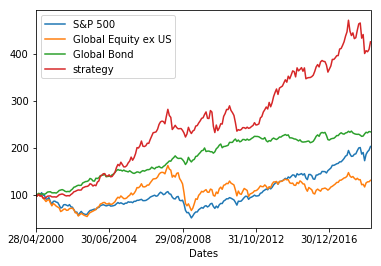

In [25]:
final.plot()
plt.show()

The dual momentum strategy performed better then single assets over the holding period that we analyzed.